## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## Loading Datasets

In [3]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


## Finding Number of Clusters for kmeans

In [4]:
a = df.iloc[:, [0,1,2,3]].values
from sklearn.cluster import KMeans
ab = []

for i in range (1,5):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(a)
    ab.append(kmeans.inertia_)

## Elbow Method to find no of clusters

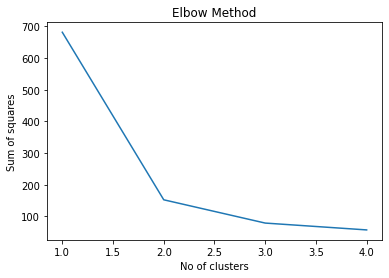

In [5]:
plt.plot(range(1,5), ab)
plt.title("Elbow Method")
plt.xlabel('No of clusters')
plt.ylabel('Sum of squares')
plt.show()

## By elbow method we can say that no of clusters will be 3

In [6]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
b_kmeans = kmeans.fit_predict(a)

## Visualizing the Clusters of the columns of 3 columns

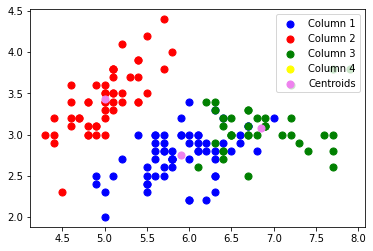

In [13]:
plt.scatter(a[b_kmeans == 0,0], a[b_kmeans == 0,1], s=50, c= 'blue', label = 'Column 1')
plt.scatter(a[b_kmeans == 1,0], a[b_kmeans == 1,1], s=50, c= 'red', label = 'Column 2')
plt.scatter(a[b_kmeans == 2,0], a[b_kmeans == 2,1], s=50, c= 'green', label = 'Column 3')
plt.scatter(a[b_kmeans == 3,0], a[b_kmeans == 3,1], s=50, c= 'yellow', label = 'Column 4')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=50, c='violet', label='Centroids')

plt.legend()